<a href="https://colab.research.google.com/github/himanshu062/Social_Media_Sentiment_Analysis/blob/main/Sentiment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Twitter Dataset Analysis***

In [ ]:
import csv
import time
import pandas as pd
import string
from nltk.corpus import stopwords
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import re
from collections import Counter
from string import punctuation
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
col_names=['date','user','text','likes','retweets']
df = pd.read_csv('/content/modi_data100k.csv', names=col_names)
df.head()

,date,user,text,likes,retweets
0,2019-03-31 04:28:27,Mussara77296944,@mubasherlucman Pritam Das Mukerjee estimated ...,0,0
1,2019-03-31 04:28:27,RealNaqvi,@CNNnews18 @RevathiRajeevan @anuradhasays It’s...,0,0
2,2019-03-31 04:28:27,Suresh05333402,@Tejasvi_Surya @narendramodi is the real joker...,0,0
3,2019-03-31 04:28:20,SaneenJavali,Mega Analysis: 5 years Report Card of #Modi Go...,0,0
4,2019-03-31 04:28:20,kanchandwivedi3,"India takes a giant leap in space, shoots down...",0,0


In [ ]:
df.count()

date        100000
user        100000
text        100000
likes       100000
retweets    100000
dtype: int64

In [ ]:
# Sort dataframe by date column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

,date,user,text,likes,retweets
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0


In [ ]:
df.shape

(100000, 5)

In [ ]:
df = df.drop_duplicates('text')
df.shape

(94814, 5)

**Data Analysis**

In [ ]:
#Extract the tweets with most number of likes
fav_max = np.max(df['likes'])
fav = df[df.likes == fav_max].index[0]
print("\nThe tweet with more likes is: \n{}".format(df['text'][fav]))
print("Number of likes: {}".format(fav_max))


The tweet with more likes is: 
During 2014 Election, 60 Bollywood Celebs appealed to not Vote for Modi
Some of them were:
Imtiaz
Nandita
Zoya Akhtar
Kabir Khan
Mahesh Bhatt
Aditi Rao

Result: BJP won 282 seats (NDA 336 seats)

Now in 2019, Over 100 filmmakers urge people to not vote for Modi

Guess the result?
Number of likes: 18186


In [ ]:
#Extract the tweets with most number of retweets
rt_max = np.max(df['retweets'])
rt = df[df.retweets == rt_max].index[0]
print("\nThe tweet with more retweets is: \n{}".format(df['text'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with more retweets is: 
"UPA 2 was a disgrace as far as the science &amp; tech initiatives in the country was concerned. It is Modi ji who took bold decisions" says Madhavan Nair, Fr head of ISRO, &amp; man behind success of Chandrayaan

Cong shackled our pride - ISRO. Modi ji set it fly! 
#IndiaSpaceSuperPower https://t.co/TJV4UWxDwg
Number of retweets: 6700


<Axes: xlabel='date'>

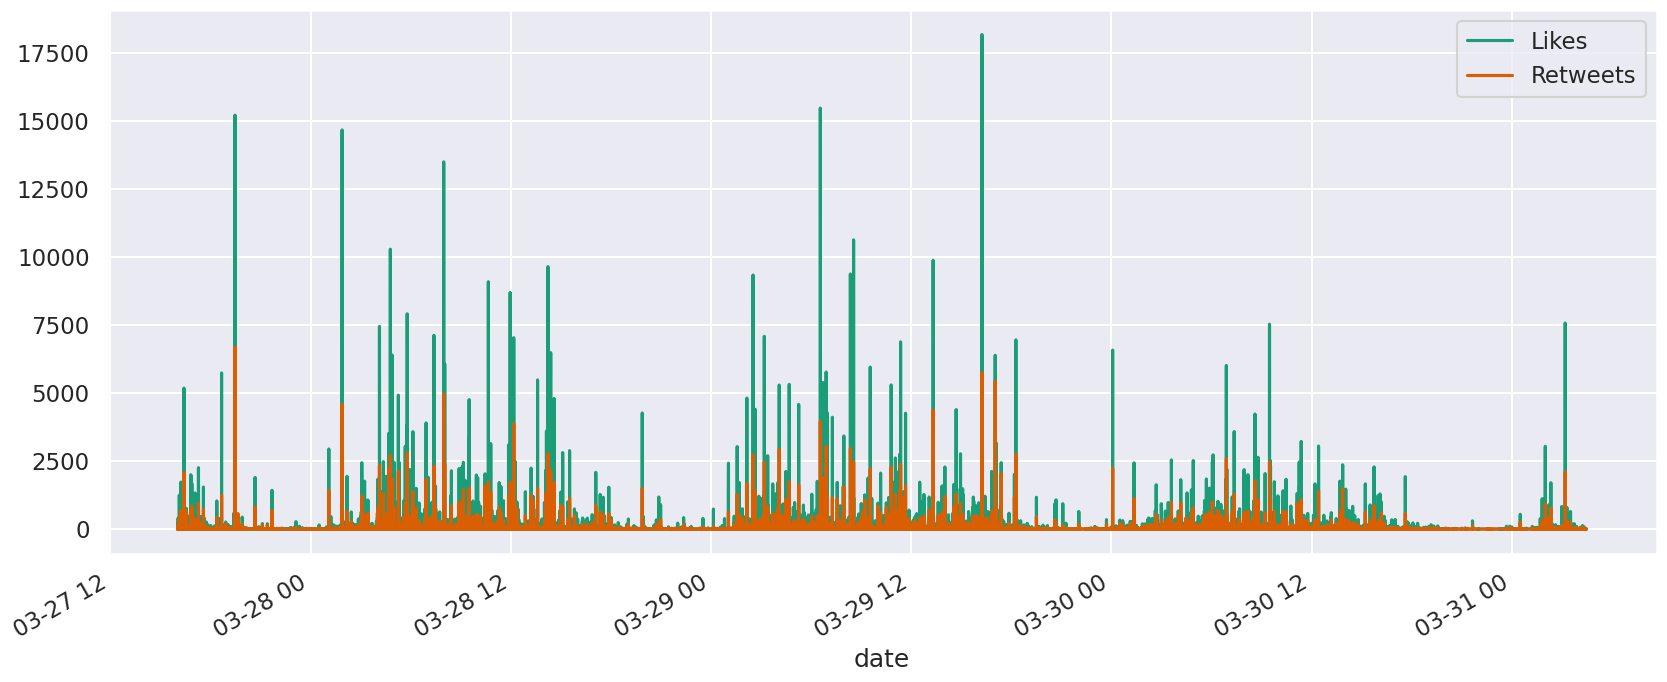

In [ ]:
# Create time series for the data:
#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['likes'].values, index=df['date'])
tret = pd.Series(data=df['retweets'].values, index=df['date'])
# Likes vs retweets visualization:
tfav.plot(figsize=(20,8), label="Likes", legend=True)
tret.plot(figsize=(20,8), label="Retweets", legend=True)

In [ ]:
#function to extract hashtags from every tweet
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)

    return hashtags

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
HT_regular = hashtag_extract(df['text'])
# unnesting list
HT_unnested = sum(HT_regular,[])

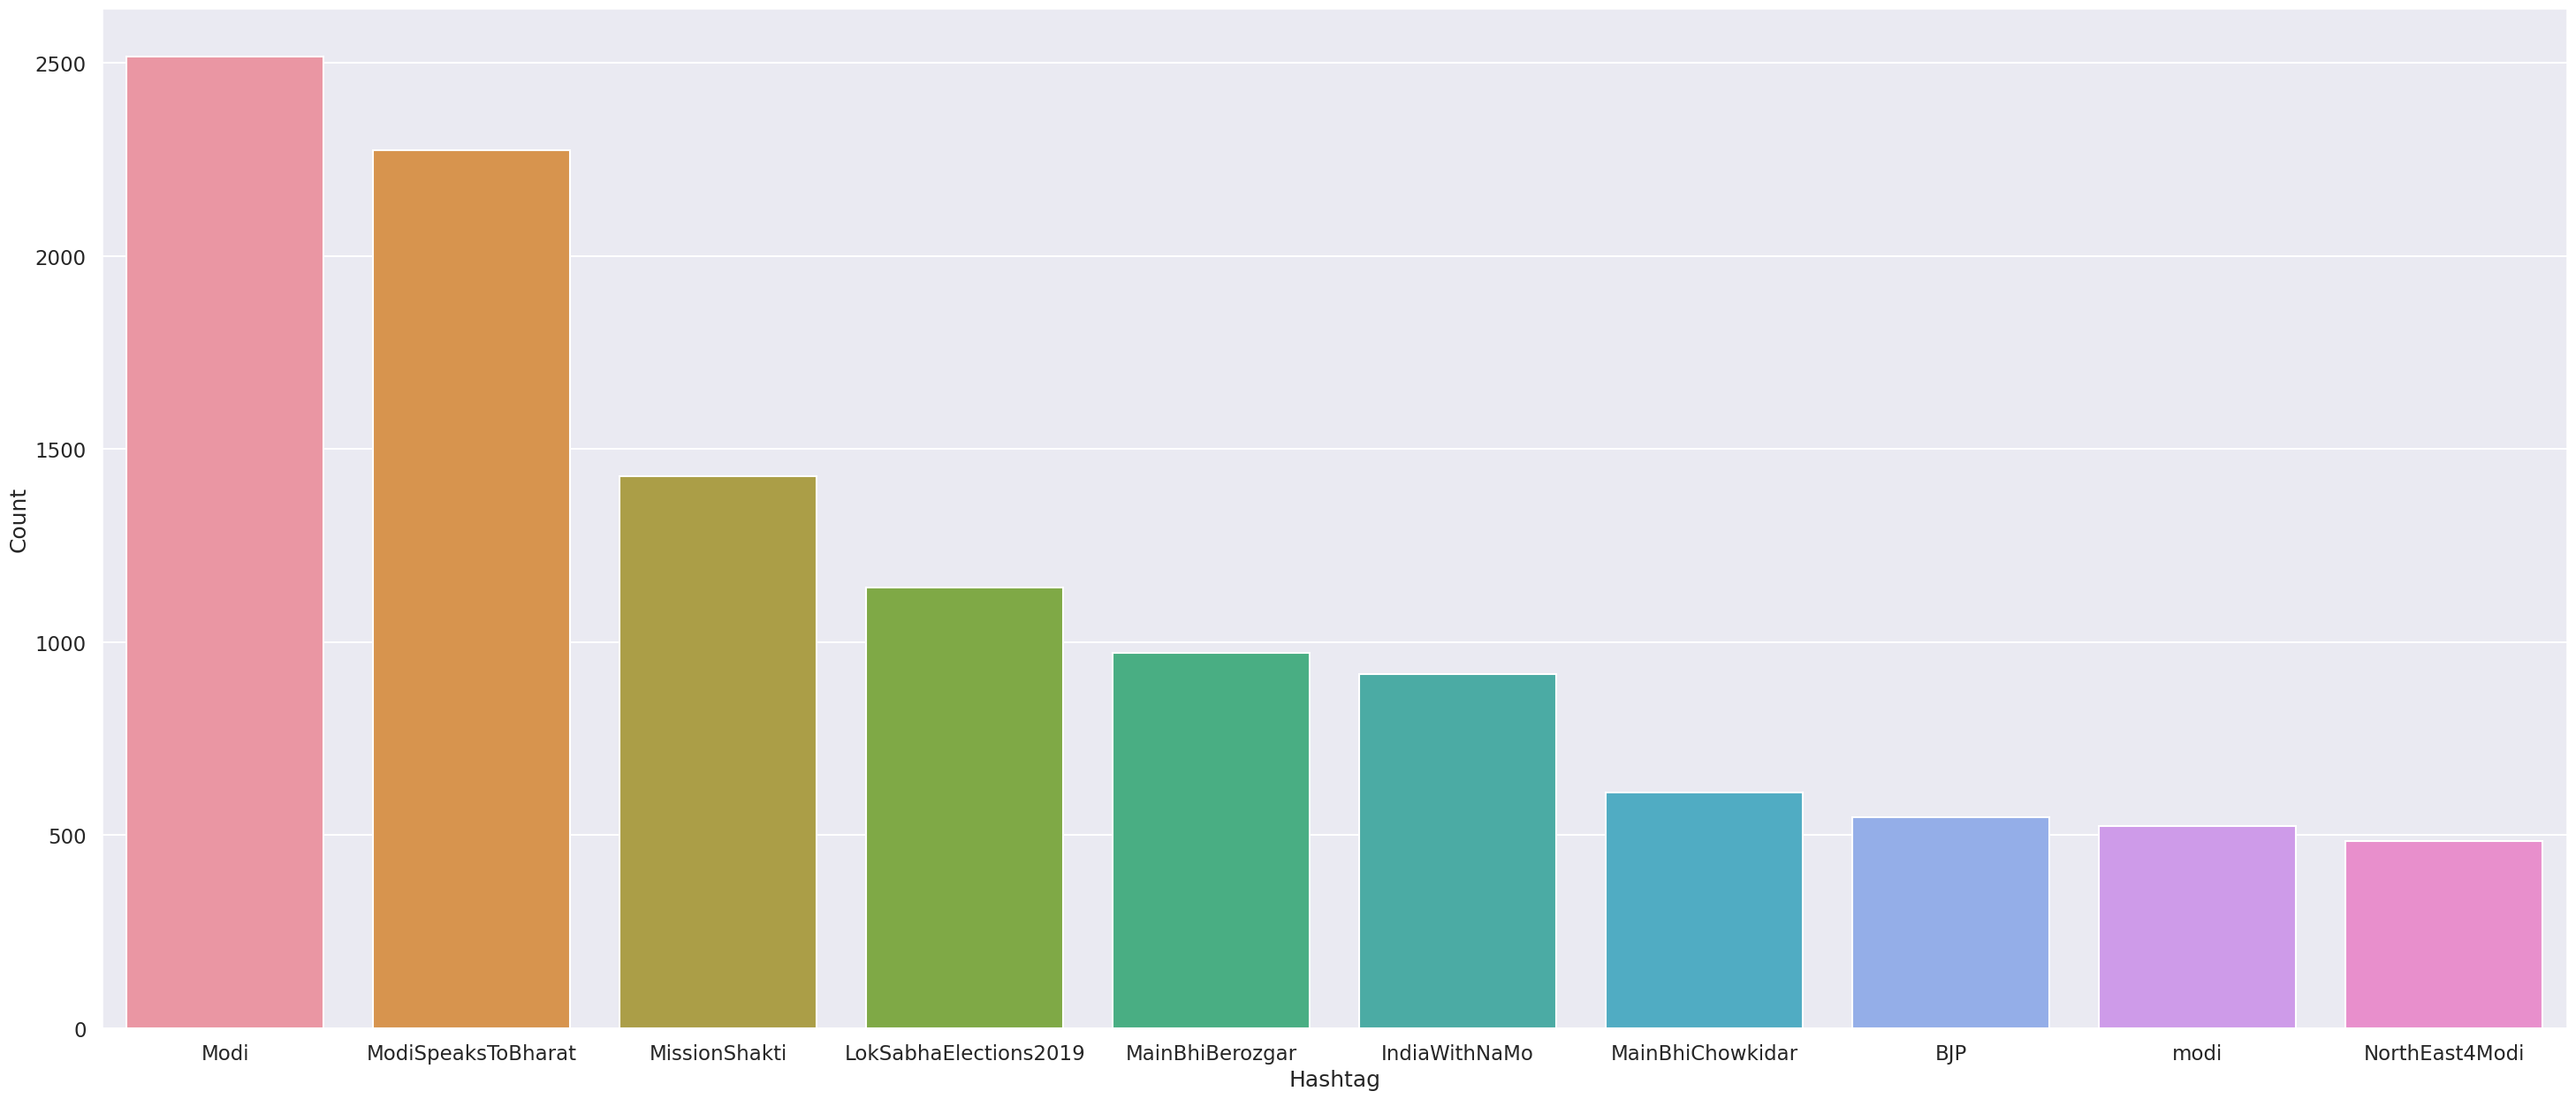

In [ ]:
a = nltk.FreqDist(HT_unnested)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(36,15))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#Calculating correlation between the likes and retweets
df['likes'].corr(df['retweets'])

0.9541340696132355

<Axes: xlabel='likes', ylabel='retweets'>

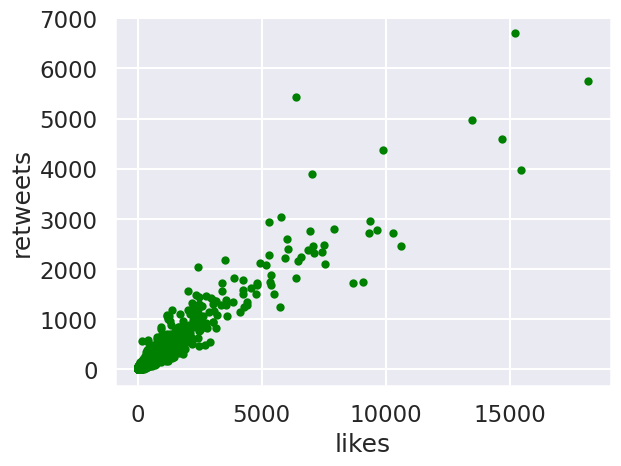

In [ ]:
#Scatter plot using likes and retweets
df.plot.scatter(x='likes',y='retweets',c='g')

**Data Cleaning**

In [ ]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff')
    return tweet
df['clean_text'] = df['text'].apply(processTweet)
df.head()

,date,user,text,likes,retweets,clean_text
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0,the and other opposition party cry for poor pe...
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0,jobs – promise made and delivered the modi gov...
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0,freeloader with degree entire political scienc...
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0,have been following tweets have question not m...
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0,the kind bluff voters have called modi rural p...


In [ ]:
# drop duplicates
df = df.drop_duplicates('clean_text')
df.shape

(80893, 6)

**Sentiment Categorizing**

In [ ]:
# TextBlob is a Lexicon-based sentiment analyzer It has some predefined rules or we can say word and weight dictionary,
#where it has some scores that help to calculate a sentence's polarity.

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
df['category'] = df['clean_text'].apply(analyze_sentiment)
df.head()

<ipython-input-53-8307ac800241>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['clean_text'].apply(analyze_sentiment)


,date,user,text,likes,retweets,clean_text,category
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0,the and other opposition party cry for poor pe...,-1
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0,jobs – promise made and delivered the modi gov...,0
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0,freeloader with degree entire political scienc...,-1
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0,have been following tweets have question not m...,1
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0,the kind bluff voters have called modi rural p...,1


**Visualization of Sentiment**

In [ ]:
# check the number of positive vs. negative vs. neutral tagged sentences
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]
print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  35745
number of negative categorized text is: 17784
number of neutral categorized text is: 27364
total length of the data is:            80893


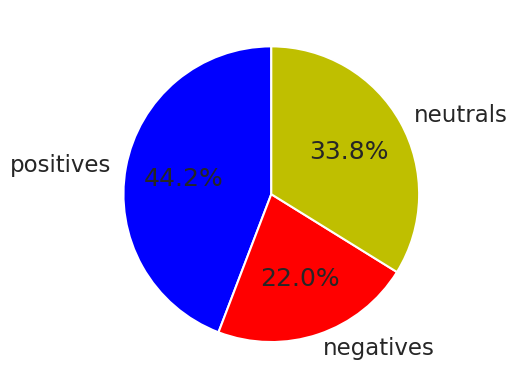

In [ ]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['b', 'r', 'y']
plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

**Data Visualization**

In [ ]:
# tokenize helper function
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_text'].apply(text_process) # tokenize style 1
df['no_modi'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,date,user,text,likes,retweets,clean_text,category,no_modi
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0,the and other opposition party cry for poor pe...,-1,"[opposition, party, cry, poor, people, small, ..."
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0,jobs – promise made and delivered the modi gov...,0,"[jobs, –, promise, made, delivered, government..."
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0,freeloader with degree entire political scienc...,-1,"[freeloader, degree, entire, political, scienc..."
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0,have been following tweets have question not m...,1,"[following, tweets, question, think, fit, repl..."
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0,the kind bluff voters have called modi rural p...,1,"[kind, bluff, voters, called, rural, punjab, e..."


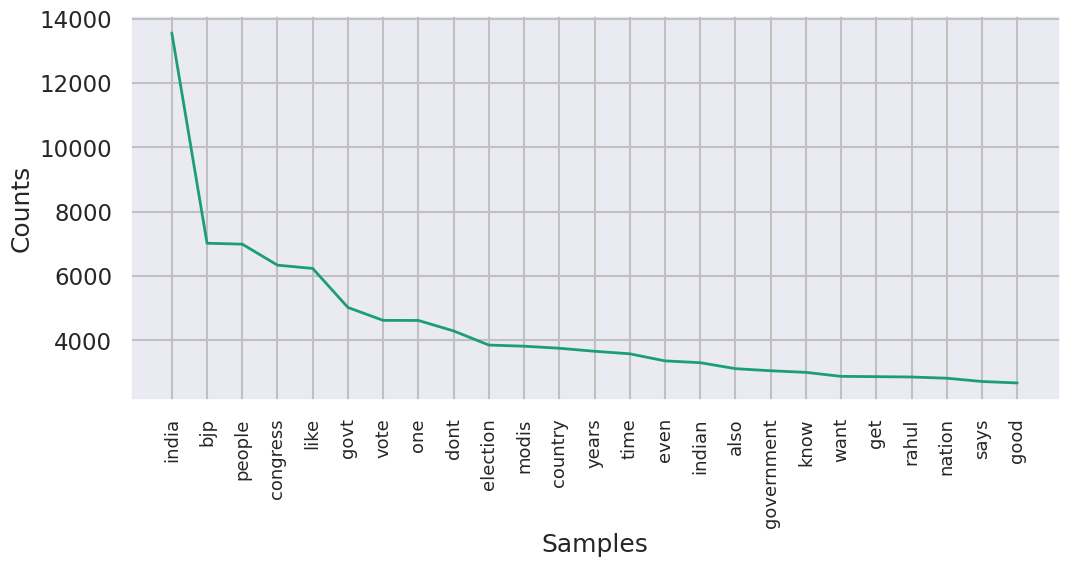

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

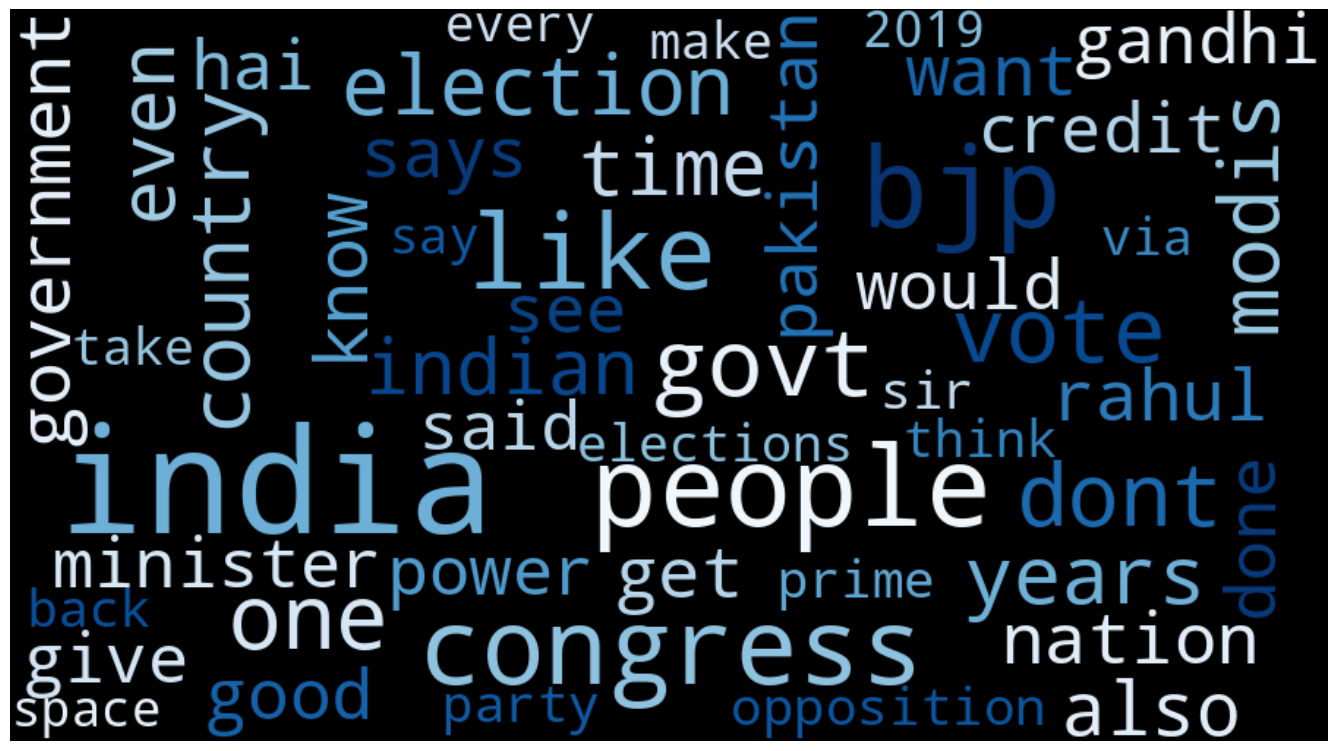

In [ ]:
# split sentences to get individual words
all_words = []

for line in df['no_modi']: # try 'tokens'
    all_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

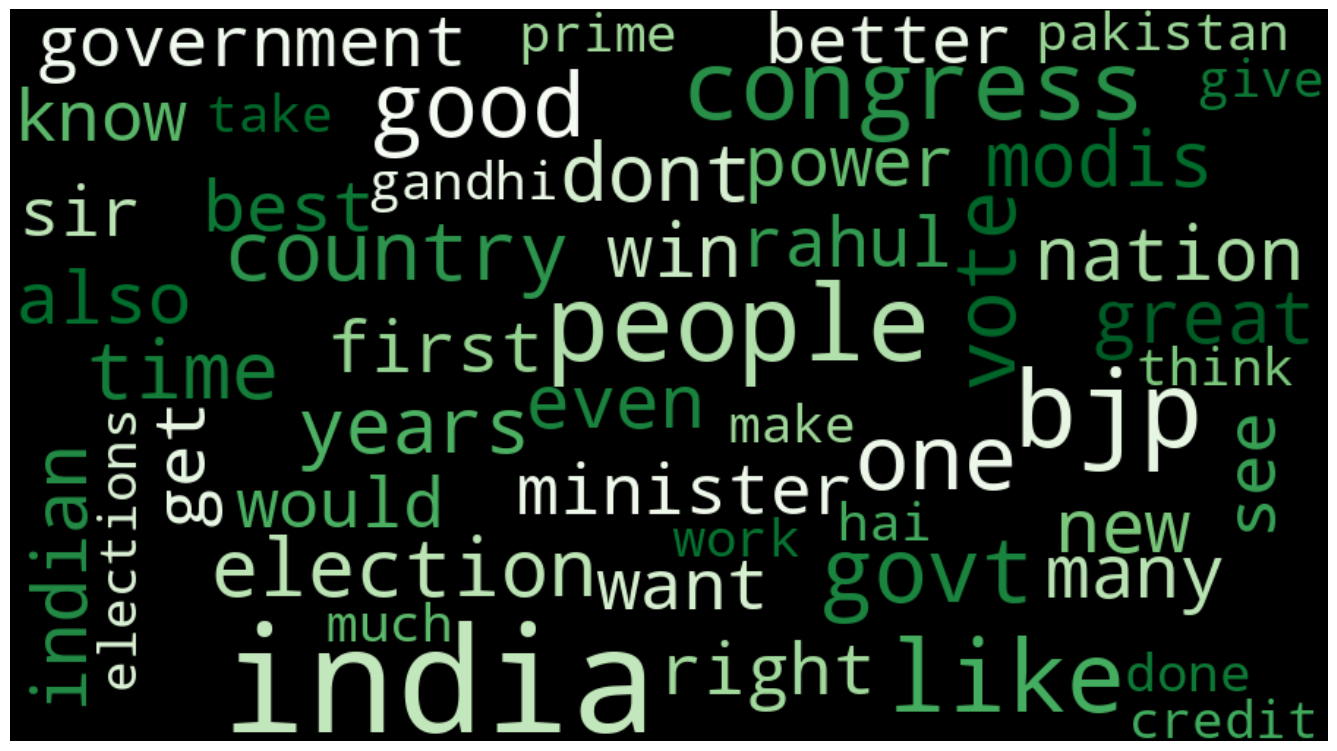

In [ ]:
# split sentences to get individual words
# wordcloud for positive words
all_pos_words = []
df_modi_pos = df[df.category==1]
for line in df_modi_pos['no_modi']: # try 'tokens'
    all_pos_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_pos_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Greens',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

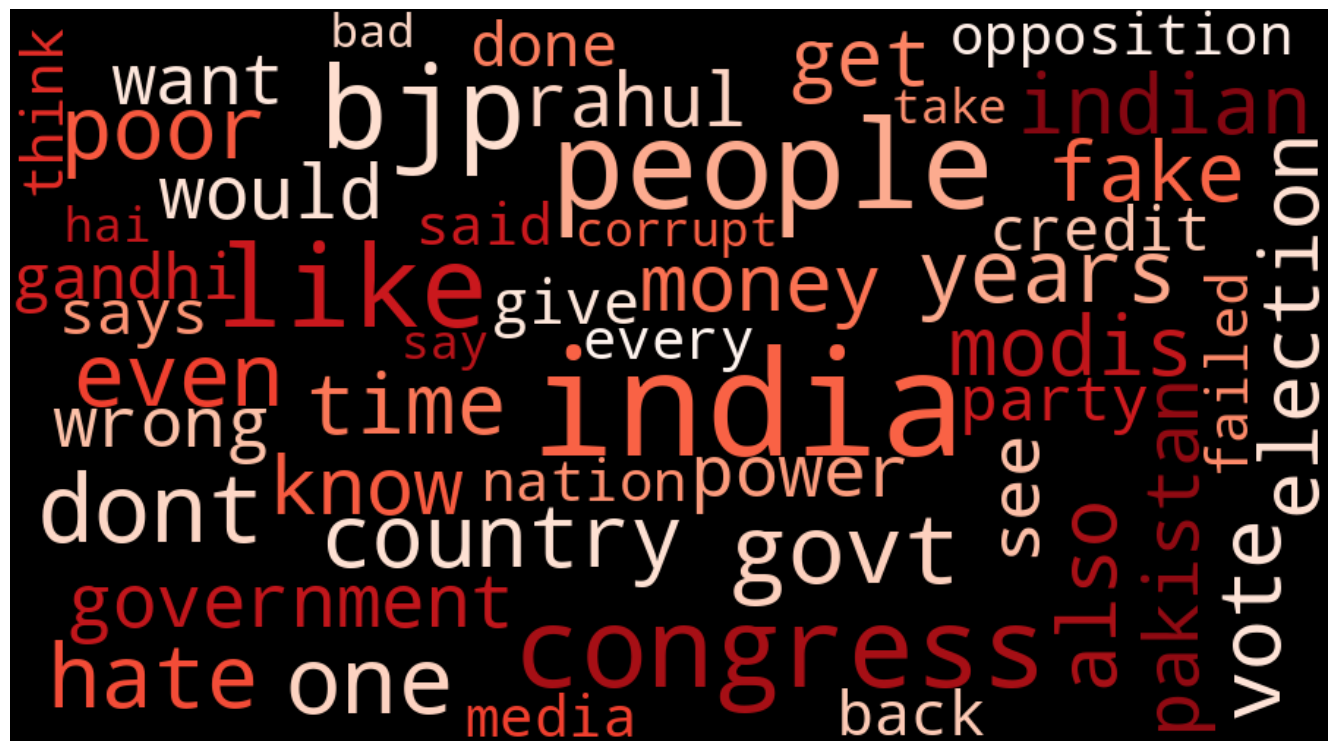

In [ ]:
# split sentences to get individual words
# word cloud for negative words
all_neg_words = []
df_modi_neg = df[df.category==-1]
#df_modi_neg.head()
for line in df_modi_neg['no_modi']: # try 'tokens'
    all_neg_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_neg_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Cleaned data**

In [ ]:
dataset = df.filter(['clean_text','category'], axis=1)
dataset.shape

(80893, 2)

In [ ]:
dataset.to_csv('dataset.csv', index = False, sep=",", encoding="utf-8")

***Reddit Dataset Analysis***

In [ ]:
col_names=["index","keyword",'Post','Score','Comments','link','domain','url','postid','subreddit','Date']
df = pd.read_csv('/content/newdata.csv', names=col_names)
df.head()

,index,keyword,Post,Score,Comments,link,domain,url,postid,subreddit,Date
0,1,modi,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,https://www.reddit.com/r/india/comments/avghfn...,self.india,/r/india/comments/avghfn/r_megathread_ii_india...,avghfn,india,02-27-2019
1,2,modi,Trump used accent to imitate India's prime min...,26074,3631,http://thehill.com/homenews/administration/370...,thehill.com,/r/worldnews/comments/7s6k5t/trump_used_accent...,7s6k5t,worldnews,01-22-2018
2,3,modi,Indian Prime Minister Narendra Modi told Germa...,58611,3242,http://in.reuters.com/article/us-germany-india...,in.reuters.com,/r/worldnews/comments/6efgnz/indian_prime_mini...,6efgnz,worldnews,05-31-2017
3,4,modi,[R] Megathread III: India-Pakistan Border Skir...,218,2734,https://www.reddit.com/r/india/comments/aw38i5...,self.india,/r/india/comments/aw38i5/r_megathread_iii_indi...,aw38i5,india,03-01-2019
4,5,modi,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,https://www.reddit.com/r/india/comments/5btlxy...,self.india,/r/india/comments/5btlxy/modi_from_nov_8_to_ab...,5btlxy,india,11-08-2016


In [ ]:
df.count()

index        3425
keyword      3425
Post         3425
Score        3425
Comments     3425
link         3425
domain       3425
url          3425
postid       3425
subreddit    3425
Date         3425
dtype: int64

In [ ]:
df = df.drop_duplicates('postid')
df.shape

(2114, 11)

In [ ]:
df = df.filter(['Post','Score','Comments','Date'], axis=1)
df.head()

,Post,Score,Comments,Date
0,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,02-27-2019
1,Trump used accent to imitate India's prime min...,26074,3631,01-22-2018
2,Indian Prime Minister Narendra Modi told Germa...,58611,3242,05-31-2017
3,[R] Megathread III: India-Pakistan Border Skir...,218,2734,03-01-2019
4,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,11-08-2016


In [ ]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['Score'])
rt_max = np.max(df['Comments'])

fav = df[df.Score == fav_max].index[0]
rt = df[df.Comments == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(df['Post'][fav]))
print("Number of likes: {}".format(fav_max))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(df['Post'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with more likes is: 
Indian Prime Minister Narendra Modi told German Chancellor Angela Merkel in talks in Berlin on Tuesday that India would stay in the Paris climate accord even if the United States pulled out
Number of likes: 58611

The tweet with more retweets is: 
[R] Megathread II: India-Pakistan Border Skirmish
Number of retweets: 5408


<Axes: xlabel='Date'>

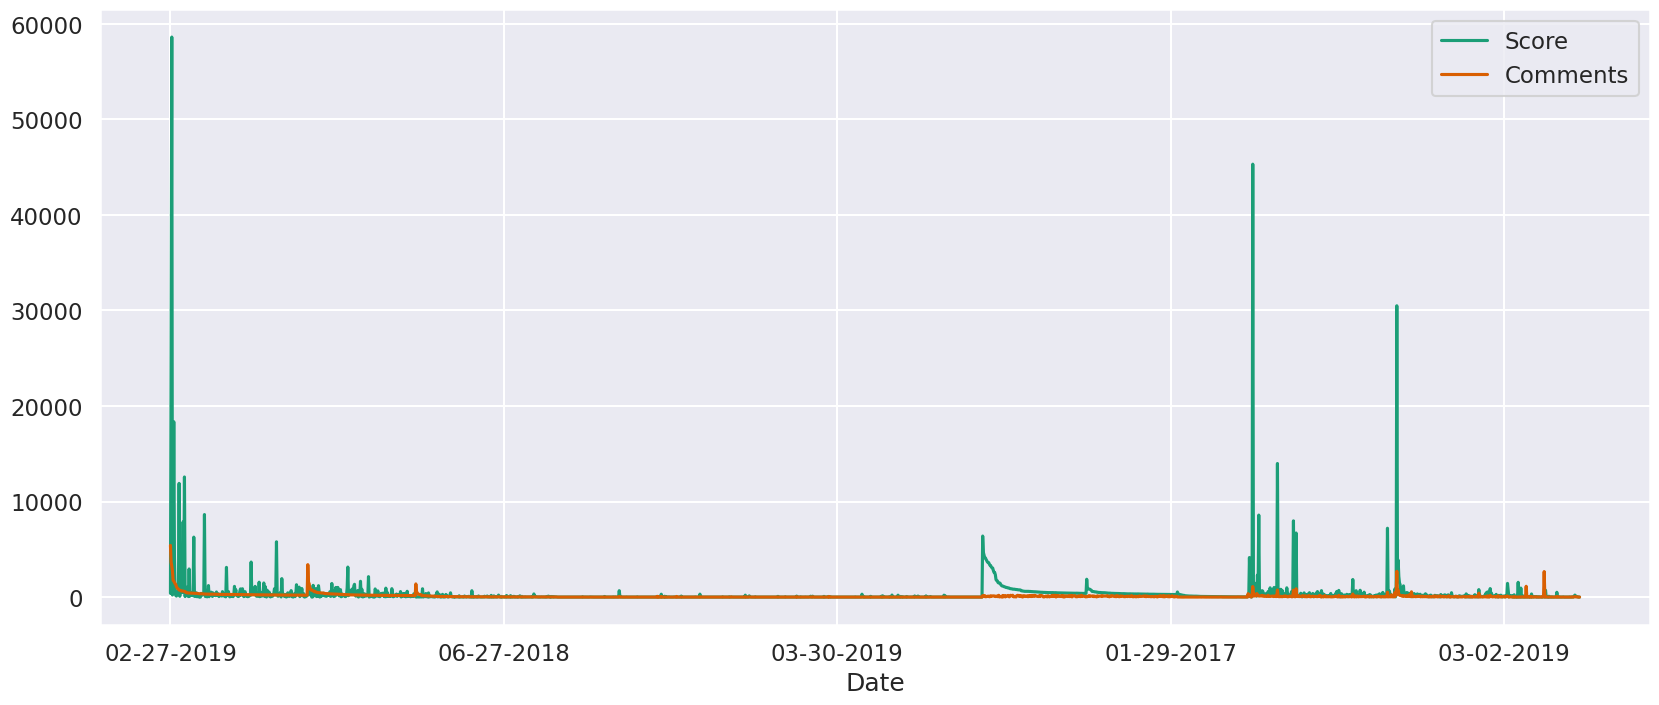

In [ ]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['Score'].values, index=df['Date'])
tret = pd.Series(data=df['Comments'].values, index=df['Date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(20,8), label="Score", legend=True)
tret.plot(figsize=(20,8), label="Comments", legend=True)

In [ ]:
df['Score'].corr(df['Comments'])

0.48313614932545496

<Axes: xlabel='Score', ylabel='Comments'>

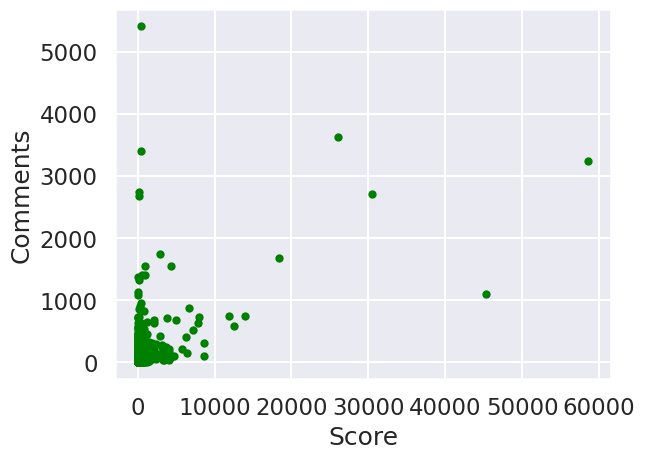

In [ ]:
df.plot.scatter(x='Score',y='Comments',c='g')

**Analysis of Reddit Comments**

In [ ]:
col_names=["Sub ID","Comment ID",'Comment','score','subreddit','Date']
df = pd.read_csv('/content/newc.csv', names=col_names)
df.head()

,Sub ID,Comment ID,Comment,score,subreddit,Date
0,avghfn,ehezjqx,Though most of the users probably are familiar...,1,india,02-27-2019
1,avghfn,ehexxze,My parents live near the border area. They sai...,65,india,02-27-2019
2,avghfn,ehfyqe8,Jets flying really close to Islamabad right no...,51,india,02-28-2019
3,avghfn,eheygig,I feel for the brave wing commander. Being cap...,46,india,02-27-2019
4,avghfn,ehey8v5,I switched on Republic TV just to check out wh...,158,india,02-27-2019


In [ ]:
df.count()

Sub ID        69561
Comment ID    69561
Comment       69560
score         69561
subreddit     69561
Date          69561
dtype: int64

In [ ]:
df.shape

(69561, 6)

In [ ]:
df = df.drop_duplicates('Comment')
df.shape

(37249, 6)

In [ ]:
# Sort dataframe by date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

,Sub ID,Comment ID,Comment,score,subreddit,Date
0,jj1aq,c2cjtpg,My family is Mormon. I have never tried to ex...,7,Buddhism,2011-08-15
1,jj1aq,c2cpquv,Buddhism has very much a lot compatible with C...,1,Buddhism,2011-08-15
2,jj1aq,c2clf2o,seriously: **don't say a thing**. first of al...,3,Buddhism,2011-08-15
3,jj1aq,c2cjj1f,"What you have learned is yours and only yours,...",26,Buddhism,2011-08-15
4,jj1aq,c2cjsxz,"For your own benefit, you may want to read, ""L...",7,Buddhism,2011-08-15


<Axes: xlabel='Date'>

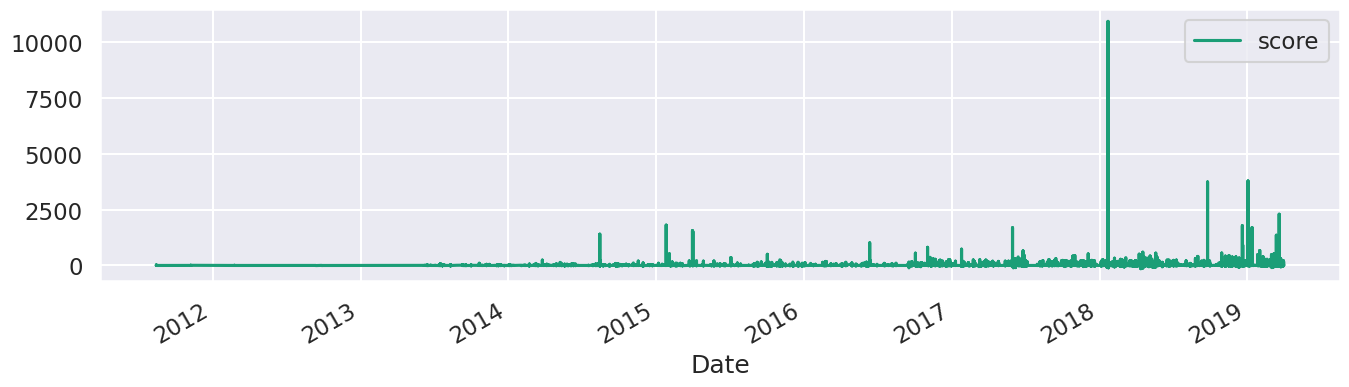

In [ ]:
# Create time series for the data:
tfav = pd.Series(data=df['score'].values, index=df['Date'])
tfav.plot(figsize=(16,4), label="score", legend=True)

In [ ]:
df = df.filter(['Comment'], axis=1)
df.head()

,Comment
0,My family is Mormon. I have never tried to ex...
1,Buddhism has very much a lot compatible with C...
2,seriously: **don't say a thing**. first of al...
3,"What you have learned is yours and only yours,..."
4,"For your own benefit, you may want to read, ""L..."


**Data Cleaning**

In [ ]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', str(tweet))
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip('')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff')
    return tweet
#

df['clean_comment'] = df['Comment'].apply(processTweet)
df.head()


,Comment,clean_comment
0,My family is Mormon. I have never tried to ex...,family mormon have never tried explain them t...
1,Buddhism has very much a lot compatible with C...,buddhism has very much lot compatible with chr...
2,seriously: **don't say a thing**. first of al...,seriously don say thing first all they won get...
3,"What you have learned is yours and only yours,...",what you have learned yours and only yours wha...
4,"For your own benefit, you may want to read, ""L...",for your own benefit you may want read living ...


**Sentiment Categorizing**

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
df['category'] = df['clean_comment'].apply(analyze_sentiment)
df.head()

,Comment,clean_comment,category
0,My family is Mormon. I have never tried to ex...,family mormon have never tried explain them t...,1
1,Buddhism has very much a lot compatible with C...,buddhism has very much lot compatible with chr...,1
2,seriously: **don't say a thing**. first of al...,seriously don say thing first all they won get...,-1
3,"What you have learned is yours and only yours,...",what you have learned yours and only yours wha...,0
4,"For your own benefit, you may want to read, ""L...",for your own benefit you may want read living ...,1


**Visualization of Sentiment**

In [ ]:
# check the number of positive vs. negative tagged sentences
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]
print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  15830
number of negative categorized text is: 8277
number of neutral categorized text is: 13142
total length of the data is:            37249


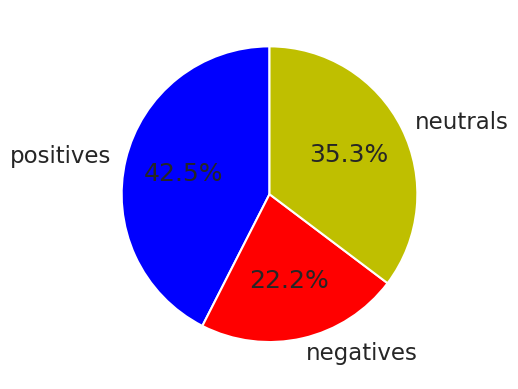

In [ ]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['b', 'r', 'y']
plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

**Data Visualization**

In [ ]:
# tokenize helper function
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_comment'].apply(text_process) # tokenize style 1
df['no_modi'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()


,Comment,clean_comment,category,no_modi
0,My family is Mormon. I have never tried to ex...,family mormon have never tried explain them t...,1,"[family, mormon, never, tried, explain, still,..."
1,Buddhism has very much a lot compatible with C...,buddhism has very much lot compatible with chr...,1,"[buddhism, much, lot, compatible, christianity..."
2,seriously: **don't say a thing**. first of al...,seriously don say thing first all they won get...,-1,"[seriously, say, thing, first, get, complex, e..."
3,"What you have learned is yours and only yours,...",what you have learned yours and only yours wha...,0,"[learned, want, teach, different, focus, goal,..."
4,"For your own benefit, you may want to read, ""L...",for your own benefit you may want read living ...,1,"[benefit, may, want, read, living, buddha, liv..."


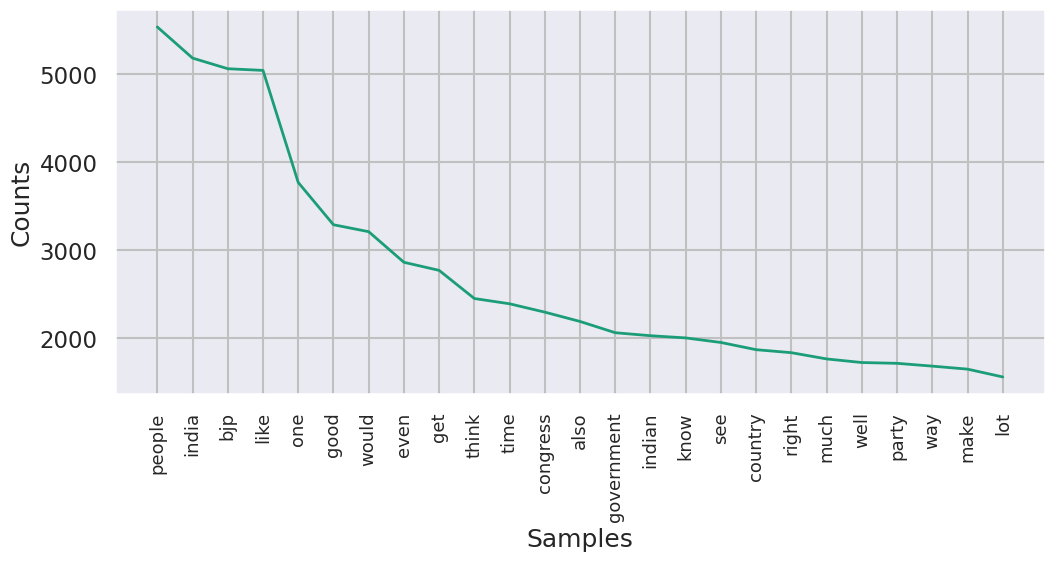

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

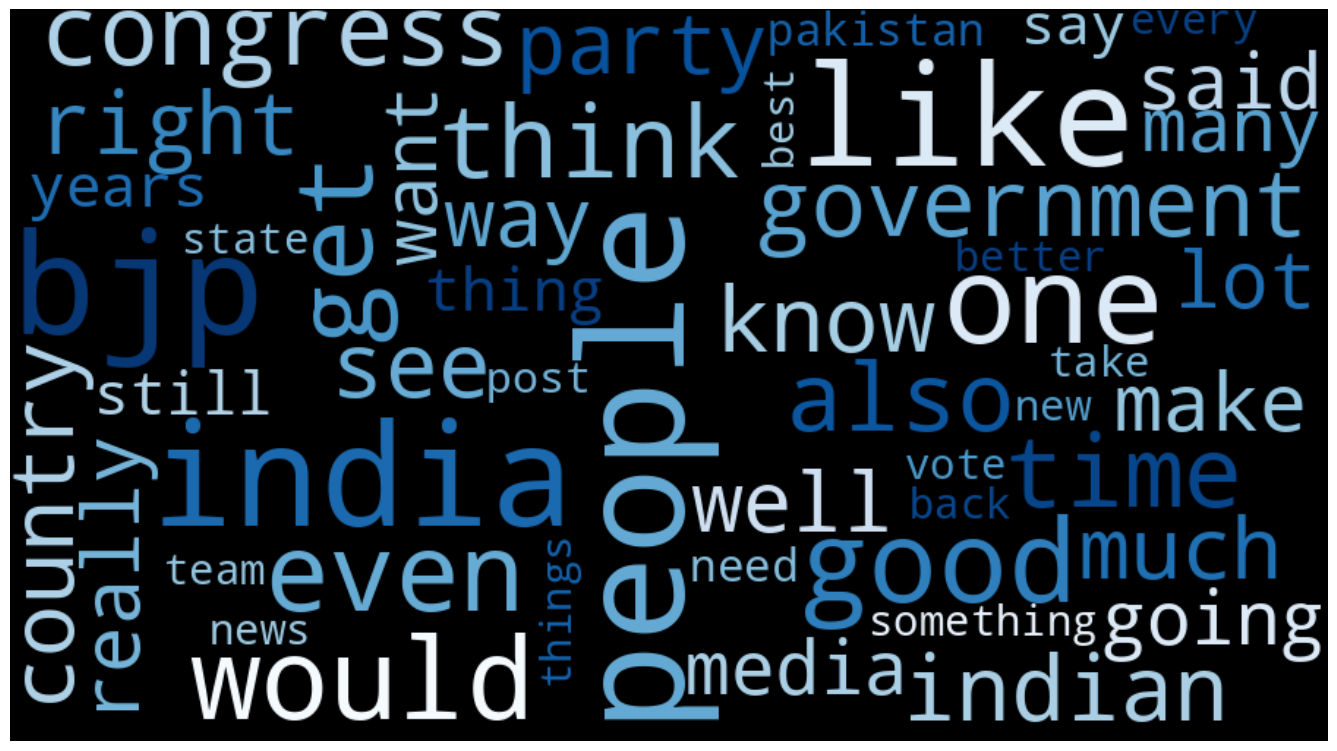

In [ ]:
# split sentences to get individual words
all_words = []

for line in df['no_modi']: # try 'tokens'
    all_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Cleaned data**

In [ ]:
dataset = df.filter(['clean_comment','category'], axis=1)
dataset.head()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
dataset.to_csv('redt_dataset.csv', index = False, sep=",", encoding="utf-8")


**COMBINING BOTH THE CLEANED DATASET AND APPLY MACHINE lEARNING MODELS ON THEM TO MAKE PREDICTIONS**

In [ ]:
from IPython import display
import math
import pandas as pd
import numpy as np

from pyspark.sql import SQLContext
from pyspark import SparkContext

from pyspark.sql.types import *

**Loading the Datasets**

In [ ]:
sc =SparkContext()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
customSchema = StructType([
    StructField("clean_text", StringType()),
    StructField("category", StringType())])

In [ ]:
filename1 = '/content/twtr_dataset.csv'
filename2 = '/content/redt_dataset.csv'

In [ ]:
df1 = sqlContext.read.format("csv").option("header", "true").schema(customSchema).load(filename1)
df1.count()

192131

In [ ]:
df2 = sqlContext.read.format("csv").option("header", "true").schema(customSchema).load(filename2)
df2.count()

38305

Combining the datset

In [ ]:
df = df1.union(df2)
df.count()

230436

In [ ]:
data = df.na.drop(how='any')
data.show(10)

+--------------------+--------+
|          clean_text|category|
+--------------------+--------+
|when modi promise...|      -1|
|talk all the nons...|       0|
|what did just say...|       1|
|asking his suppor...|       1|
|answer who among ...|       1|
|kiya tho refresh ...|       0|
|this comes from c...|       0|
|with upcoming ele...|       1|
|gandhi was gay do...|       1|
|things like demon...|       1|
+--------------------+--------+
only showing top 10 rows



In [ ]:
data.printSchema()

root
 |-- clean_text: string (nullable = true)
 |-- category: string (nullable = true)



**Preprocessing**

In [ ]:
from pyspark.sql.functions import col
data.groupBy("category").count().orderBy(col("count").desc()).show()

+--------+-----+
|category|count|
+--------+-----+
|       1|86224|
|       0|66446|
|      -1|42908|
+--------+-----+



**Model Pipeline**

Spark Machine Learning Pipelines API is similar to Scikit-Learn. Our pipeline includes three steps:

regexTokenizer: Tokenization (with Regular Expression)

stopwordsRemover: Remove Stop Words

countVectors: Count vectors (“document-term vectors”)

In [ ]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression

# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="clean_text", outputCol="words", pattern="\\W")

# stop words
add_stopwords = ["http","https","amp","rt","t","c","the"]

stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=30000, minDF=5)

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
label_stringIdx = StringIndexer(inputCol = "category", outputCol = "label")

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
dataset.show(10)

+--------------------+--------+--------------------+--------------------+--------------------+-----+
|          clean_text|category|               words|            filtered|            features|label|
+--------------------+--------+--------------------+--------------------+--------------------+-----+
|when modi promise...|      -1|[when, modi, prom...|[when, modi, prom...|(24654,[0,1,7,30,...|  2.0|
|talk all the nons...|       0|[talk, all, the, ...|[talk, all, nonse...|(24654,[0,1,2,8,1...|  1.0|
|what did just say...|       1|[what, did, just,...|[what, did, just,...|(24654,[0,2,3,20,...|  0.0|
|asking his suppor...|       1|[asking, his, sup...|[asking, his, sup...|(24654,[0,6,7,8,1...|  0.0|
|answer who among ...|       1|[answer, who, amo...|[answer, who, amo...|(24654,[0,22,69,1...|  0.0|
|kiya tho refresh ...|       0|[kiya, tho, refre...|[kiya, tho, refre...|(24654,[670,1258,...|  1.0|
|this comes from c...|       0|[this, comes, fro...|[this, comes, fro...|(24654,[0,1,5,13,.

**Partition Training & Test sets**

In [ ]:
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 136810
Test Dataset Count: 58768


**Model Training and Evaluation**

Logistic Regression using Count Vector Features

Our model will make predictions and score on the test set; we then look at the top 10 predictions from the highest probability.

In [ ]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)

predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0).select("clean_text","category","probability","label","prediction")\
.orderBy("probability", ascending=False).show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|even though iit and iim stu...|       1|[1.0,2.994715938169204E-47,...|  0.0|       0.0|
| chennai super kings for th...|       1|[0.9999999999327918,3.00407...|  0.0|       0.0|
| demonetisation fails then ...|       1|[0.9999999996781512,1.31809...|  0.0|       0.0|
|even the most important peo...|       1|[0.9999999995227018,1.54500...|  0.0|       0.0|
|british indians and boys lo...|       1|[0.9999999868124005,7.91154...|  0.0|       0.0|
|ist aht teh chikcf rom retr...|       1|[0.9999999829165941,1.81451...|  0.0|       0.0|
| this article adblocker unf...|       1|[0.9999999573693761,1.58618...|  0.0|       0.0|
| 006 save mojo 4653 full ep...|       1|[0.9999999499271705,2.12238...|  0.0|       0.0|
|first the

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
lrAccuracy = evaluator.evaluate(predictions)
print(lrAccuracy)

0.7630902460324891


**ROC curve**

In [ ]:
trainingSummary = lrModel.summary

# for multiclass, we can inspect metrics on a per-label basis
print("\nFalse positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nTrue positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nPrecision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("\nRecall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("\nF-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("\nAccuracy: %s\n\nFPR: %s\n\nTPR: %s\n\nF-measure: %s\n\nPrecision: %s\n\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))


False positive rate by label:
label 0: 0.09738602301137479
label 1: 0.12571776290313658
label 2: 0.007207173477601602

True positive rate by label:
label 0: 0.9022395841954546
label 1: 0.9421863220247712
label 2: 0.633557987454958

Precision by label:
label 0: 0.8798973315899075
label 1: 0.793789924506388
label 2: 0.9610304165190546

Recall by label:
label 0: 0.9022395841954546
label 1: 0.9421863220247712
label 2: 0.633557987454958

F-measure by label:
label 0: 0.8909284079764629
label 1: 0.861645441203991
label 2: 0.7636685367275945

Accuracy: 0.8569329727359111

FPR: 0.08724393212802409

TPR: 0.8569329727359112

F-measure: 0.85311176742765

Precision: 0.8684521481065657

Recall: 0.8569329727359112


**Logistic Regression using TF-IDF Features**

In [ ]:
from pyspark.ml.feature import HashingTF, IDF

hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=30000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx])

pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)

(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)

predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|even though iit and iim stu...|       1|[0.9999999999994509,3.31693...|  0.0|       0.0|
|even the most important peo...|       1|[0.9999999990692536,2.48986...|  0.0|       0.0|
| demonetisation fails then ...|       1|[0.9999999896432606,1.21932...|  0.0|       0.0|
|british indians and boys lo...|       1|[0.9999999706794043,1.57588...|  0.0|       0.0|
| 006 save mojo 4653 full ep...|       1|[0.9999999582194772,1.51624...|  0.0|       0.0|
|thanks for doing this ama t...|       1|[0.9999999384654559,1.58473...|  0.0|       0.0|
| chennai super kings for th...|       1|[0.9999999272348401,3.66927...|  0.0|       0.0|
|ist aht teh chikcf rom retr...|       1|[0.9999997960064807,2.62093...|  0.0|       0.0|
| some sit

In [ ]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.7372505603571424

**Cross-Validation**

Let’s now try cross-validation to tune our hyper parameters, and we will only tune the count vectors Logistic Regression.

In [ ]:
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) # regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
#            .addGrid(model.maxIter, [10, 20, 50]) #Number of iterations
#            .addGrid(idf.numFeatures, [10, 100, 1000]) # Number of features
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)

cvModel = cv.fit(trainingData)

predictions = cvModel.transform(testData)
# Evaluate best model
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.8204986242592617

**Naive Bayes**

In [ ]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
nbModel = nb.fit(trainingData)
predictions = nbModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|respected sir sar and madam...|       1|[1.0,7.189807728555095E-19,...|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,3.0678900200880045E-19...|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,1.0164852830337E-21,1....|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,2.148570726833468E-22,...|  0.0|       0.0|
| which team are you gunning...|       1|[1.0,2.7478039530513863E-27...|  0.0|       0.0|
| things opinion most likely...|       1|[1.0,2.624224481927939E-31,...|  0.0|       0.0|
|patna railway station with ...|       1|[1.0,3.7479313617118113E-32...|  0.0|       0.0|
| list the free encyclopedia...|       1|[1.0,2.4841094530498986E-33...|  0.0|       0.0|
|faith the

In [ ]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
nbAccuracy = evaluator.evaluate(predictions)
print(nbAccuracy)

0.7638882628872739


**DecisionTreeClassifier**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(trainingData)
predictions = dtModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
| imran khan and modi who be...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
| after all for most liberal...|      -1|[0.9041476159372959,0.01747...|  2.0|       0.0|
| 100 kim rockhyun nominated...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
| didn’ know who modi was 20...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
| joke the day have the abil...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
| also think lot about palad...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
| also beginner serious budd...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
| and hamare desh right wing...|       1|[0.9041476159372959,0.01747...|  0.0|       0.0|
|aap too g

In [ ]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
dtAccuracy = evaluator.evaluate(predictions)
print(dtAccuracy)

0.26901574576035264


**Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="label", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)
# Train model with Training Data
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|even though iit and iim stu...|       1|[0.6419357714216497,0.15573...|  0.0|       0.0|
|let one one food beef obvio...|       1|[0.603333854885307,0.141062...|  0.0|       0.0|
| dhruv your frustration wit...|       1|[0.5772674630697763,0.21622...|  0.0|       0.0|
|the article written juvenil...|       1|[0.5662813465635792,0.21059...|  0.0|       0.0|
|thanks for doing this ama t...|       1|[0.5576017467967028,0.23117...|  0.0|       0.0|
|here perspective the curren...|       1|[0.5575874482262682,0.22051...|  0.0|       0.0|
|now that the results that t...|       1|[0.5552436099436302,0.20034...|  0.0|       0.0|
| has with the stark differe...|       1|[0.5528734046142612,0.24436...|  0.0|       0.0|
|personall

In [ ]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
rfAccuracy = evaluator.evaluate(predictions)
print(rfAccuracy)

0.26806258434437946


**OnevsRest classifer**

In [ ]:
from pyspark.ml.classification import LogisticRegression, OneVsRest

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

ovr = OneVsRest(classifier=lr)

ovrModel = ovr.fit(trainingData)

# score the model on test data.
predictions = ovrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","label","prediction") \
    .show(n = 10, truncate = 30)

+------------------------------+--------+-----+----------+
|                    clean_text|category|label|prediction|
+------------------------------+--------+-----+----------+
| after grand success coffee...|       1|  0.0|       0.0|
| also fuel for mahagathband...|       1|  0.0|       0.0|
| breaking india shoots down...|       1|  0.0|       0.0|
| cant hate modi without lov...|      -1|  2.0|       0.0|
| congratulations the entire...|       1|  0.0|       0.0|
| cool down chowkidar relax ...|       1|  0.0|       0.0|
| desperation win shows surv...|       1|  0.0|       0.0|
| dont believe modi will spa...|       1|  0.0|       0.0|
| gadkari only has hold vidh...|       1|  0.0|       0.0|
| good one exactly narendra ...|       1|  0.0|       0.0|
+------------------------------+--------+-----+----------+
only showing top 10 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
ovrAccuracy = evaluator.evaluate(predictions)
print(ovrAccuracy)

0.737704846980744


**Visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Logistic regression', 'Naive Bayes', 'Random Forest', 'OneVsRest']
accuracy = [lrAccuracy,nbAccuracy,rfAccuracy, ovrAccuracy]

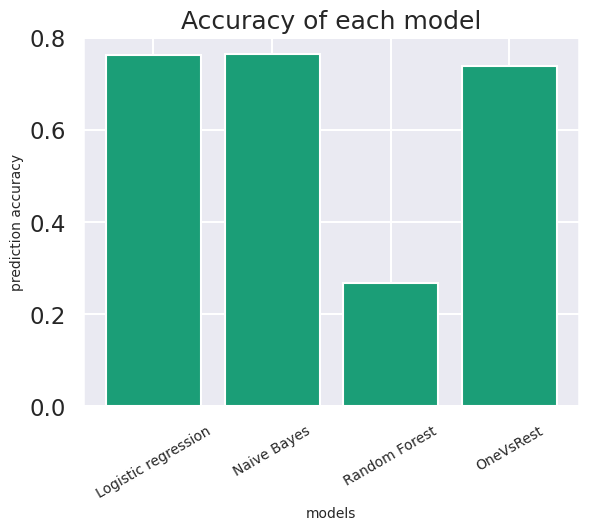

In [ ]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(model))
    plt.bar(index, accuracy)
    plt.xlabel('models', fontsize=10)
    plt.ylabel('prediction accuracy', fontsize=10)
    plt.xticks(index, model, fontsize=10, rotation=30)
    plt.title('Accuracy of each model')
    plt.show()

plot_bar_x()
